# litbank.
a powerful content-based book recommendation engine


## Dataset Information
The dataset may need to be split into training and test sets.

The training set is:

The test set is: 

### Tech Stack:
Programming Langauge: Python

LLM Engine: Ollama - for running local LLMs to process text and generate embeddings

**Python Libraries**
- pandas - used to perform data manipulation and analysis
- numpy - used to perform a wide variety of mathematical operations on arrays
- matplotlib - used for data visualization and graphical plotting
- seaborn - built on matplotlib with similar functionalities

- requests - used to handle api communication (taking requests) with gollama
- faiss - used for high-performance vector similarity search for book reccomendations



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import faiss
import requests

sns.set_theme()

### Load the Dataset:

In [2]:
df = pd.read_csv(r"e:\litbank\data\books.csv")

In [3]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
# Statistical Info
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6804.000000,6767.000000,6767.000000,6.767000e+03
mean,9.780677e+12,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,2005.000000,4.130000,420.000000,5.992500e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


In [5]:
# Datatype Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


### Data Cleaning I

#### Finding the NULL values:

In [6]:
df.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

#### Removing Unneeded Fields:
- isbn13: no meaningful data
- isbn10: no meaningful data
- subtitle: 4429 NULL values + little meaningful data
- thumbnail: no meaningful data
- ratings_count: unneeded field

In [7]:
df = df.drop(columns=['isbn13', 'isbn10', 'subtitle', 'thumbnail', 'ratings_count'])
df.head()

,title,authors,categories,description,published_year,average_rating,num_pages
0,Gilead,Marilynne Robinson,Fiction,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0
1,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0
2,The One Tree,Stephen R. Donaldson,American fiction,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0
3,Rage of angels,Sidney Sheldon,Fiction,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0
4,The Four Loves,Clive Staples Lewis,Christian life,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0


### Exploring the Data

#### Exploring Categorical Attributes and Distribution

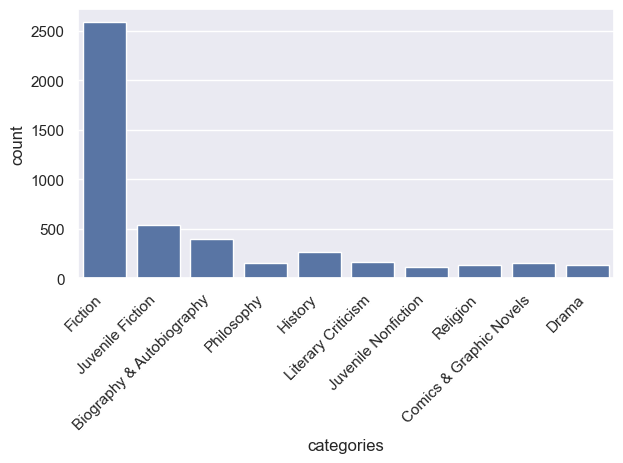

In [8]:
top_categories = df['categories'].value_counts().head(10)

sns.countplot(x='categories', data=df[df['categories'].isin(top_categories.index)])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

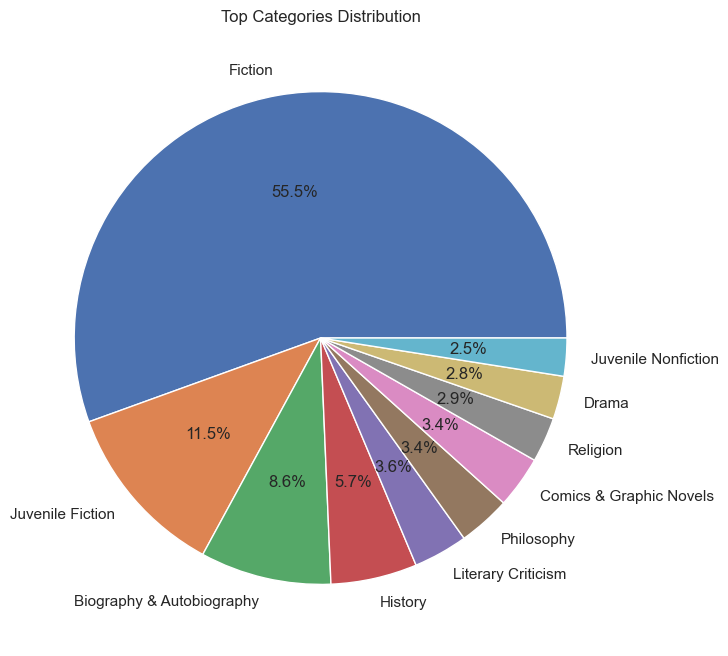

In [9]:
top_categories.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Top Categories Distribution')
plt.ylabel('')  # Remove the y-axis label
plt.show()

#### Exploring Numerical Attributes and Distribution

<Axes: xlabel='num_pages', ylabel='Count'>

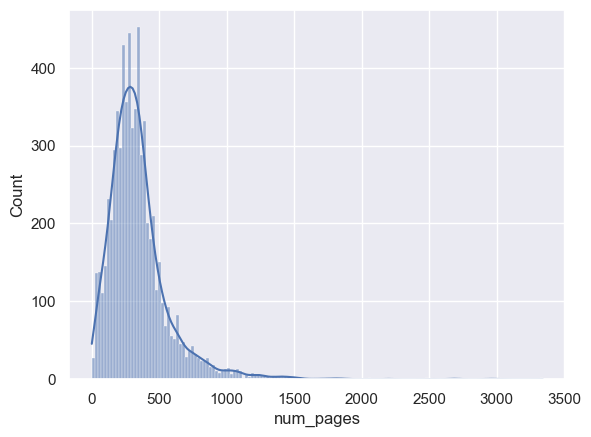

In [10]:
sns.histplot(x='num_pages', data=df, kde='True')

<Axes: xlabel='average_rating', ylabel='Count'>

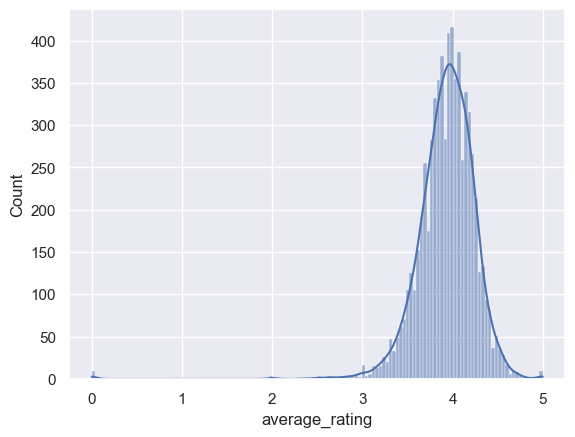

In [11]:
sns.histplot(x='average_rating', data=df, kde='True')

<Axes: xlabel='published_year', ylabel='Count'>

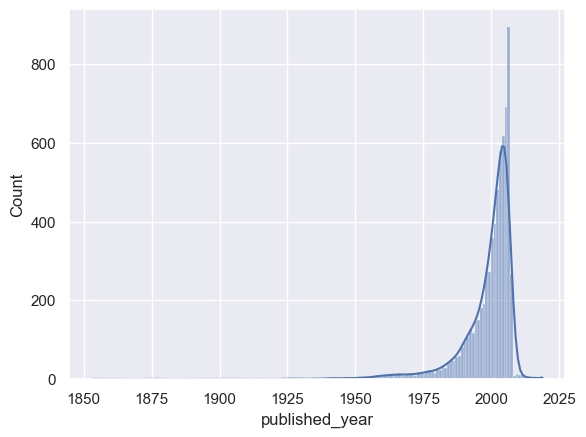

In [12]:
sns.histplot(x='published_year', data=df, kde='True')

### Creating Embeddings and Vector Store
#### Creating Textual Representations of Each Entry
title	authors	categories	description	published_year	average_rating	num_pages

In [13]:
def textual_representation(row):
    textual_representation = f"""Title: {row['title']}
Authors: {row['authors']}
Categories: {row['categories']}
Description: {row['description']}
Publishing Year: {row['published_year']}
Average Rating: {row['average_rating']}
Number of Pages: {row['num_pages']}
"""
    return textual_representation

In [14]:
df.iloc[:5].apply(textual_representation, axis=1)

0    Title: Gilead\nAuthors: Marilynne Robinson\nCa...
1    Title: Spider's Web\nAuthors: Charles Osborne;...
2    Title: The One Tree\nAuthors: Stephen R. Donal...
3    Title: Rage of angels\nAuthors: Sidney Sheldon...
4    Title: The Four Loves\nAuthors: Clive Staples ...
dtype: object

In [15]:
df['textual_representation'] = df.apply(textual_representation, axis=1)

#### Creating Embeddings
Initialising dimensionality of vectors and vector space.

Dimensionality = 4096 because that is the dimensionality of the response we get from Llama3. 

In [16]:
dim = 768
index = faiss.IndexFlatL2(dim)

Initialise input full of zeros.

In [17]:
X= np.zeros((len(df['textual_representation']), dim), dtype='float32')

Get embeddings from LLM model:

In [21]:
for i, representation in enumerate(df['textual_representation']):

    if i % 100 == 0:
        print(i)

    # Send an embedding request to Ollama, running the llama3 model
    res = requests.post('http://localhost:11434/api/embeddings',
                        json = {
                            'model': 'embeddinggemma',
                            'prompt': representation
                        })
    # Receive Response from LLama3
    embedding = res.json()['embedding']

    # Fill Array with Responses
    X[i] = np.array(embedding)

index.add(X)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800


In [22]:
# Export index
faiss.write_index(index, 'index.v1')

In [52]:
# Load index with:
index = faiss.read_index('index.v1')

first_vector = index.reconstruct(0)
print(first_vector)

[-5.37551567e-02  1.13432571e-01 -2.19824594e-02  5.54629527e-02
 -1.11144753e-02 -1.89144965e-02 -4.33016010e-02  4.10826430e-02
 -1.02049513e-02 -5.41741736e-02  5.99760376e-03  3.13925296e-02
  1.17603680e-02 -1.02304795e-03 -6.45805243e-03  3.25071514e-02
 -5.95675176e-03  5.94489202e-02  2.92462693e-03  1.60450619e-02
 -1.86468773e-02 -3.13610621e-02  1.11417612e-02 -1.10991858e-02
  6.17891690e-03 -7.53541535e-04  2.50025615e-02  3.20994668e-02
 -1.15080103e-02  1.88105963e-02  1.50070165e-03  2.18321774e-02
  6.12083785e-02 -2.18794756e-02  3.03974431e-02 -2.94600949e-02
 -2.61056647e-02 -1.11025851e-03 -4.93082702e-02  1.61752608e-02
 -2.66674161e-02  1.18084252e-02 -5.71569391e-02  4.06911187e-02
 -6.46684244e-02 -6.39960496e-03  4.72033769e-03 -3.47638316e-02
 -2.19556037e-02 -4.38026525e-03  2.67394702e-03  2.66549010e-02
 -6.42081117e-03 -4.69571678e-03 -2.00933833e-02 -7.94949941e-03
  1.86549760e-02 -1.24359420e-02 -5.93131110e-02 -7.78413787e-02
 -2.64151525e-02 -3.59796

Finding favourite book to pass into the search engine:

(In this case, we're using 'The Trial' by Franz Kafka, at position 566 in the dataframe)

In [66]:
print(df[df['authors'].str.contains('Murakami', na=False)])


                                     title                    authors  \
575                     Sputnik Sweetheart            Haruki Murakami   
576   South of the Border, West of the Sun            Haruki Murakami   
577                  The Elephant Vanishes            Haruki Murakami   
578                      Dance Dance Dance            Haruki Murakami   
586                            Underground            Haruki Murakami   
4049  South of the Border, West of the Sun            Haruki Murakami   
5771                    Kafka on the Shore            Haruki Murakami   
5783          Blind Willow, Sleeping Woman            Haruki Murakami   
6613            The Wind-up Bird Chronicle  Haruki Murakami;Jay Rubin   

               categories                                        description  \
575         Businesswomen  Twenty two year old, Sumire is in love for the...   
576      Domestic fiction  Growing up in the suburbs in post-war Japan, i...   
577                 Japan  Wh

Assigning to variable f_book

In [67]:
f_book = df.iloc[5771]

In [68]:
f_book['textual_representation']

'Title: Kafka on the Shore\nAuthors: Haruki Murakami\nCategories: Fiction\nDescription: An unlikely alliance forms between Kafka Tamura, a fifteen-year-old runaway, and the aging Nakata, a man who has never recovered from a wartime affliction, as they embark on a surreal odyssey through a strange, fantastical world.\nPublishing Year: 2006.0\nAverage Rating: 4.13\nNumber of Pages: 467.0\n'

Send the book to the model to embed (Can be any book enterred by the user, complete with tags and description)

In [69]:
res = requests.post('http://localhost:11434/api/embeddings',
                    json={
                        'model': 'embeddinggemma',
                        'prompt': f_book['textual_representation']
                    })


In [70]:
embedding = np.array([res.json()['embedding']], dtype='float32')

In [71]:
D, I = index.search(embedding, 5)

In [72]:
best_matches = np.array(df['textual_representation'])[I.flatten()]

In [73]:
for match in best_matches:
    print(match)
    print()

Title: Kafka on the Shore
Authors: Haruki Murakami
Categories: Fiction
Description: An unlikely alliance forms between Kafka Tamura, a fifteen-year-old runaway, and the aging Nakata, a man who has never recovered from a wartime affliction, as they embark on a surreal odyssey through a strange, fantastical world.
Publishing Year: 2006.0
Average Rating: 4.13
Number of Pages: 467.0


Title: The Wind-up Bird Chronicle
Authors: Haruki Murakami;Jay Rubin
Categories: Fiction
Description: nan
Publishing Year: 1999.0
Average Rating: 4.17
Number of Pages: 609.0


Title: Blind Willow, Sleeping Woman
Authors: Haruki Murakami
Categories: Fiction
Description: From the surreal to the mundane, an anthology of short fiction captures a full range of human experience, emotion, and relationship in works that chronicle a chance reunion in Italy, a holiday in Hawaii, and a romantic exile in Greece.
Publishing Year: 2007.0
Average Rating: 3.84
Number of Pages: 362.0


Title: South of the Border, West of the 

In [74]:
recommended_books = df.iloc[I.flatten()]
filtered_books = recommended_books[~recommended_books['authors'].str.contains(f_book['authors'], na=False)]